# 2.1 Preparing and exploring the data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure plots display inline
%matplotlib inline

# -------------------------------------------------------
# 1. LOAD DATA FROM EXCEL
# -------------------------------------------------------
filename = 'merged_data.xlsx'

try:
    # sheet_name=None reads all sheets into a dictionary of DataFrames
    all_sheets = pd.read_excel(filename, sheet_name=None)
    
    dfs = []
    for sheet_name, df in all_sheets.items():
        # Clean up species name if needed
        df['Species'] = sheet_name 
        dfs.append(df)
        print(f"✅ Loaded sheet '{sheet_name}': {len(df)} records")
        
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        
        # Force numeric columns
        cols = ['Precursor length', 'Mature length', 'Star length']
        for col in cols:
            if col in combined_df.columns:
                combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
        
        print(f"\nTotal records merged: {len(combined_df)}")
        display(combined_df.head())
    else:
        print("❌ No sheets found in the Excel file.")

except FileNotFoundError:
    print(f"❌ File not found: {filename}")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Loaded sheet 'Human': 514 records
✅ Loaded sheet 'House mouse': 404 records
✅ Loaded sheet 'Fruit fly': 140 records
✅ Loaded sheet 'Roundworm': 138 records

Total records merged: 1196


,MirGeneDB ID,MiRBase ID,Family,Seed,Chromosome,Start,End,Strand,Precursor sequence,Mature sequence,Star sequence,Mature location,Precursor length,Mature length,Star length,Species
0,Hsa-Let-7-P1b,hsa-let-7e,LET-7,GAGGUAG,chr19,51692793,51692859,+,UGAGGUAGGAGGUUGUAUAGUUGAGGAGGACACCCAAGGAGAUCAC...,UGAGGUAGGAGGUUGUAUAGUU,CUAUACGGCCUCCUAGCUUUCC,5p,67,22,22,Human
1,Hsa-Let-7-P1c,hsa-let-7c,LET-7,GAGGUAG,chr21,16539838,16539904,+,UGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCUGGGAGUUAAC...,UGAGGUAGUAGGUUGUAUGGUU,CUGUACAACCUUCUAGCUUUCC,5p,67,22,22,Human
2,Hsa-Let-7-P1d,hsa-let-7a-2,LET-7,GAGGUAG,chr11,122146523,122146589,-,UGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGAUAAC...,UGAGGUAGUAGGUUGUAUAGUU,CUGUACAGCCUCCUAGCUUUCC,5p,67,22,22,Human
3,Hsa-Let-7-P2a1,hsa-let-7a-1,LET-7,GAGGUAG,chr9,94175962,94176033,+,UGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCACUGGGA...,UGAGGUAGUAGGUUGUAUAGUU,CUAUACAAUCUACUGUCUUUC,5p,72,22,21,Human
4,Hsa-Let-7-P2a2,hsa-let-7a-3,LET-7,GAGGUAG,chr22,46112752,46112820,+,UGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAU...,UGAGGUAGUAGGUUGUAUAGUU,CUAUACAAUCUACUGUCUUUC,5p,69,22,21,Human


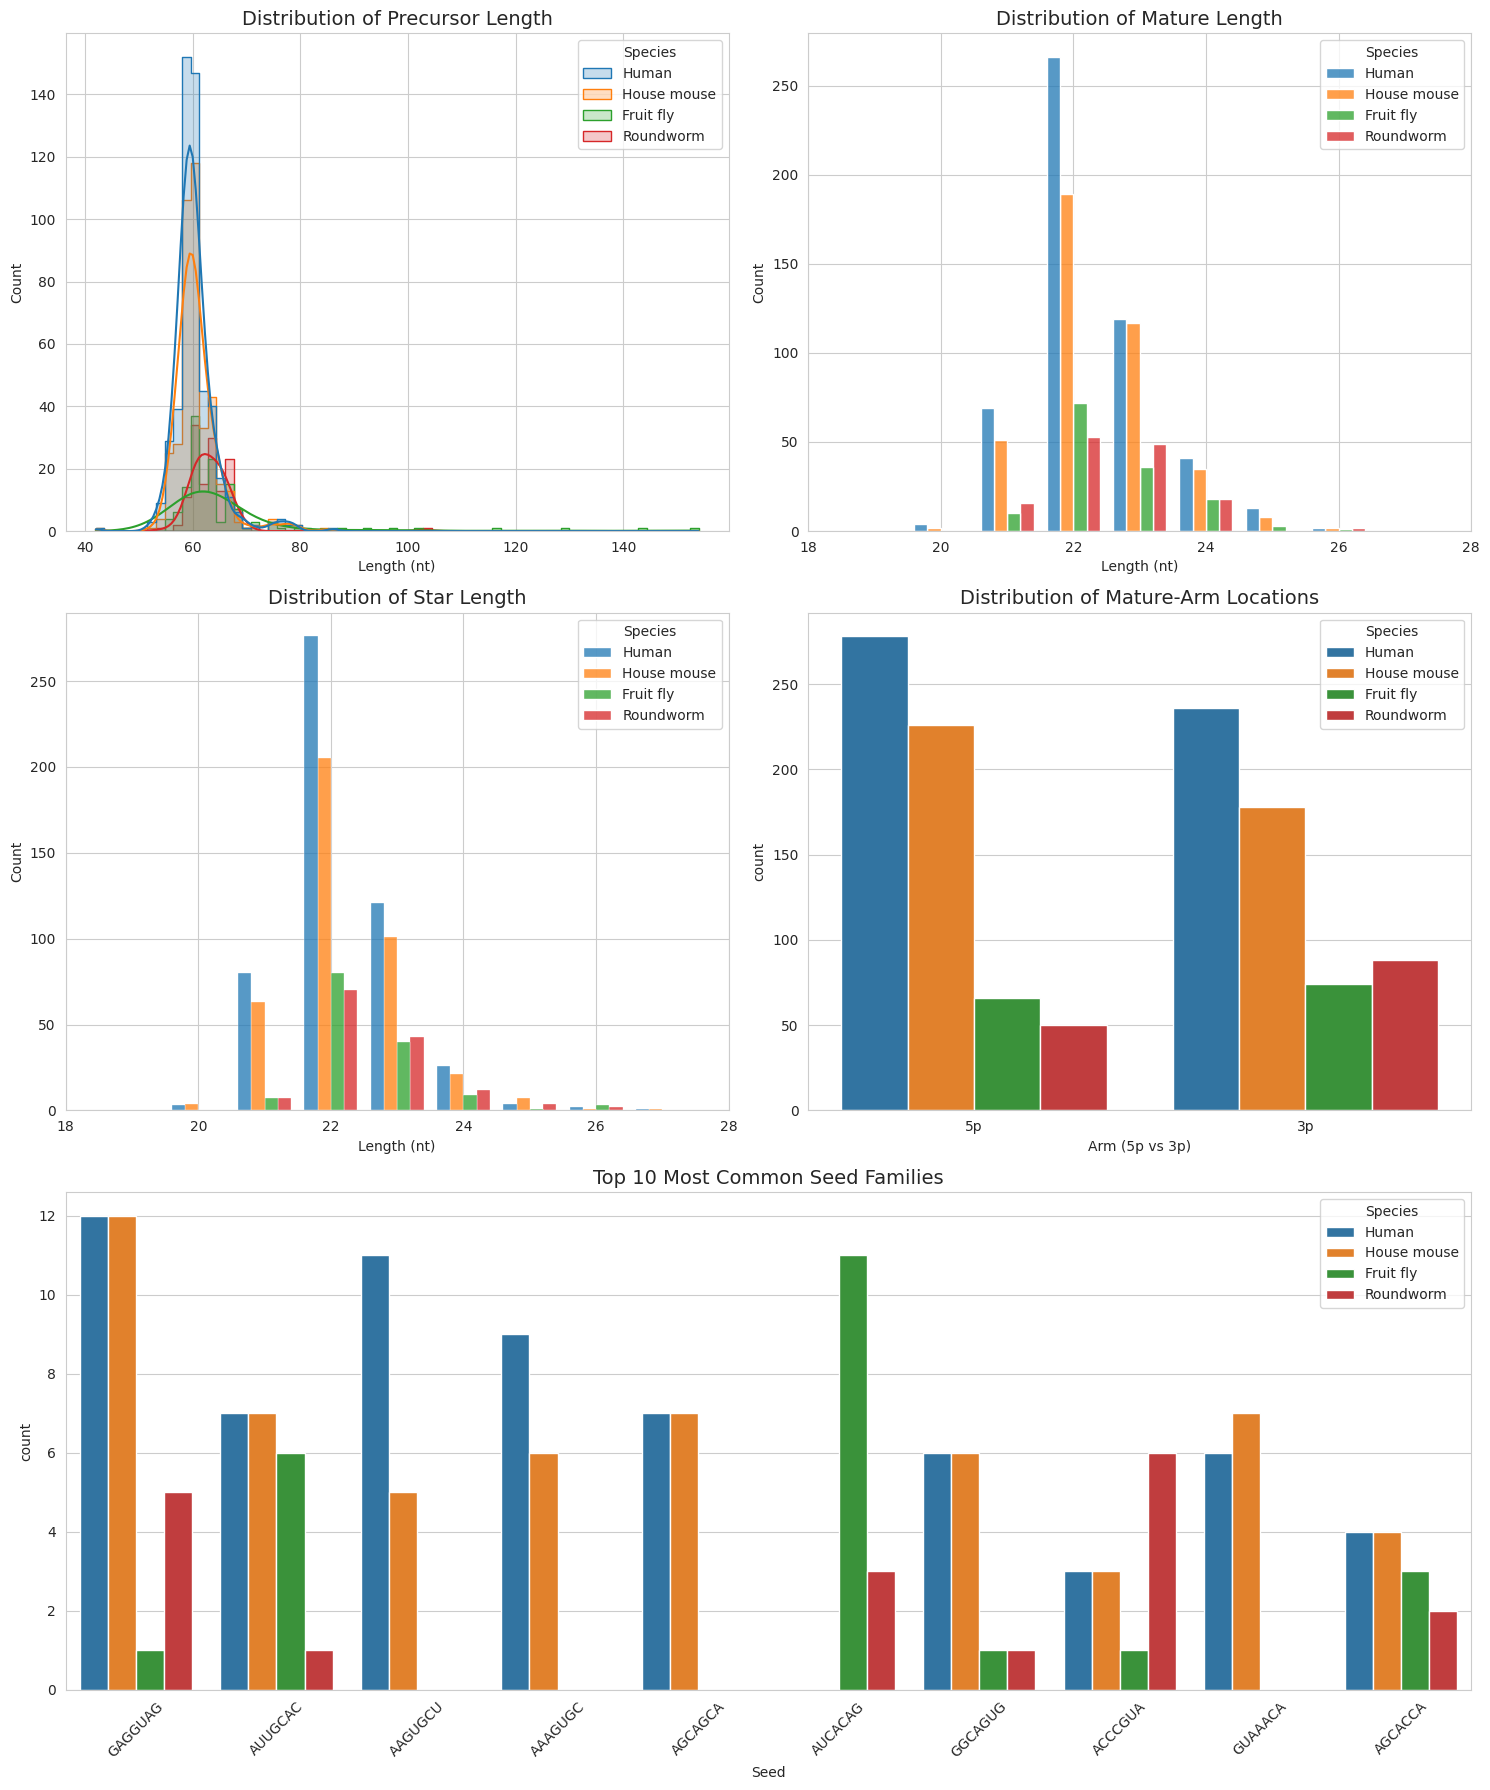

In [14]:
# -------------------------------------------------------
# 2. GENERATE PLOTS
# -------------------------------------------------------
if dfs:
    sns.set_style("whitegrid")
    
    # Create figure with grid layout (3 rows, 2 columns)
    fig = plt.figure(figsize=(15, 18))
    gs = fig.add_gridspec(3, 2)
    palette = "tab10"

    # --- Plot 1: Precursor Length ---
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=combined_df, x='Precursor length', hue='Species', 
                 kde=True, element="step", ax=ax1, palette=palette)
    ax1.set_title('Distribution of Precursor Length', fontsize=14)
    ax1.set_xlabel('Length (nt)')

    # --- Plot 2: Mature Length ---
    ax2 = fig.add_subplot(gs[0, 1])
    sns.histplot(data=combined_df, x='Mature length', hue='Species', 
                 multiple="dodge", shrink=0.8, discrete=True, ax=ax2, palette=palette)
    ax2.set_title('Distribution of Mature Length', fontsize=14)
    ax2.set_xlabel('Length (nt)')
    ax2.set_xlim(18, 28)

    # --- Plot 3: Star Length ---
    ax3 = fig.add_subplot(gs[1, 0])
    sns.histplot(data=combined_df, x='Star length', hue='Species', 
                 multiple="dodge", shrink=0.8, discrete=True, ax=ax3, palette=palette)
    ax3.set_title('Distribution of Star Length', fontsize=14)
    ax3.set_xlabel('Length (nt)')
    ax3.set_xlim(18, 28)

    # --- Plot 4: Mature-Arm Location ---
    ax4 = fig.add_subplot(gs[1, 1])
    sns.countplot(data=combined_df, x='Mature location', hue='Species', 
                  ax=ax4, palette=palette)
    ax4.set_title('Distribution of Mature-Arm Locations', fontsize=14)
    ax4.set_xlabel('Arm (5p vs 3p)')

    # --- Plot 5: Top 10 Seed Families ---
    ax5 = fig.add_subplot(gs[2, :])
    # Get top 10 most common seeds across ALL species
    top_seeds = combined_df['Seed'].value_counts().nlargest(10).index
    seed_data = combined_df[combined_df['Seed'].isin(top_seeds)]
    
    sns.countplot(data=seed_data, x='Seed', hue='Species', 
                  order=top_seeds, ax=ax5, palette=palette)
    ax5.set_title('Top 10 Most Common Seed Families', fontsize=14)
    ax5.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show() # Display in notebook
else:
    print("Data not loaded, cannot plot.")

In [15]:
# -------------------------------------------------------
# 3. PRINT STATISTICS
# -------------------------------------------------------
if dfs:
    print("=== SUMMARY STATISTICS BY SPECIES ===")
    
    # Group by Species and get descriptive stats for lengths
    stats = combined_df.groupby('Species')[['Precursor length', 'Mature length', 'Star length']].describe()
    
    # Display Mean and Std for clarity
    display(stats.loc[:, (slice(None), ['mean', 'std'])])

    print("\n=== MATURE ARM LOCATION COUNTS ===")
    arm_counts = combined_df.groupby(['Species', 'Mature location']).size().unstack(fill_value=0)
    
    # Calculate percentages row-wise
    percentages = arm_counts.div(arm_counts.sum(axis=1), axis=0) * 100

    # Combine counts and percentages into a string format
    arm_counts_with_pct = arm_counts.astype(str) + " (" + percentages.round(1).astype(str) + "%)"

    display(arm_counts_with_pct)

=== SUMMARY STATISTICS BY SPECIES ===


Precursor length            Mature length           Star length  \
                        mean        std          mean       std        mean   
Species                                                                       
Fruit fly          65.921429  14.170121     22.535714  0.932319   22.471429   
House mouse        60.690594   4.145710     22.405941  0.936476   22.198020   
Human              60.367704   3.993539     22.332685  0.947049   22.175097   
Roundworm          63.282609   4.468853     22.557971  0.959152   22.579710   

                       
                  std  
Species                
Fruit fly    0.885071  
House mouse  1.440429  
Human        1.308423  
Roundworm    0.934431


=== MATURE ARM LOCATION COUNTS ===


Mature location,3p,5p
Species,,
Fruit fly,74 (52.9%),66 (47.1%)
House mouse,178 (44.1%),226 (55.9%)
Human,236 (45.9%),278 (54.1%)
Roundworm,88 (63.8%),50 (36.2%)
